# **BrainStation Data Science Project**


In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [153]:
# path variables
path = '/content/drive/MyDrive/data/insurance.csv'

In [154]:
# read the dataset
df = pd.read_csv(path)

## Initial discovery of the dataset

In [155]:
# Explore the dataset, the dataset contains 1,338 rows, 7 columns
print(df.shape)

(1338, 7)


In [156]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [157]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [158]:
# Random saampling the dtasaet
df.sample(3)

,age,sex,bmi,children,smoker,region,charges
645,48,male,30.78,3,no,northeast,10141.1362
654,59,female,35.20,0,no,southeast,12244.5310
357,47,male,29.83,3,no,northwest,9620.3307


In [159]:
# list the types
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## Dataa Processing


In [160]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Hypothesis

1.   BIM, ages, children ages, and insurance charges are normally distributive

2.   There is no significant evidence that specific gender has higher insurance charges than the orther or vice versa






## Distributions

Text(0.5, 1.0, 'BMI Distribution')

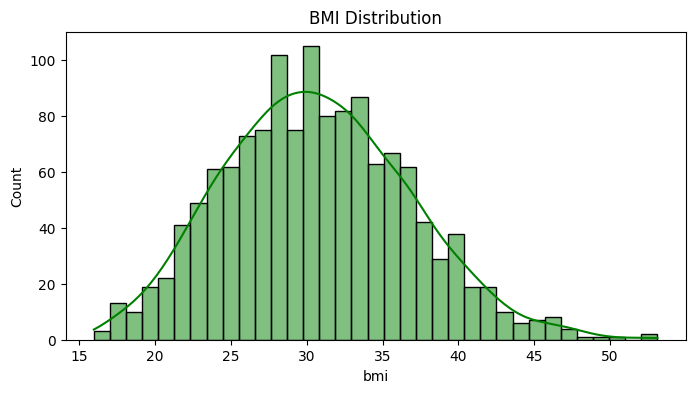

In [161]:
# plot BMI distribution
plt.figure(figsize = (8, 4))
sns.histplot(data = df, x = 'bmi', kde = True, bins = 35, color = 'green')
plt.title('BMI Distribution', fontsize=12)

In [162]:
stats.shapiro(df['bmi'])

ShapiroResult(statistic=0.9938861727714539, pvalue=2.6033414542325772e-05)

### Pvalue is less than 0.05, rejects hypothesis BIM is normally distributive

Text(0.5, 1.0, 'Age Distribution')

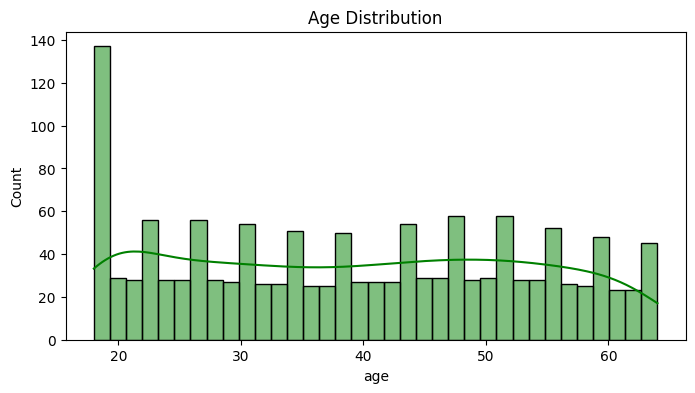

In [163]:
# plot age distribution
plt.figure(figsize = (8, 4))
sns.histplot(data = df, x = 'age',kde = True, bins = 35, color = 'green')
plt.title('Age Distribution',fontsize = 12)

In [164]:
stats.shapiro(df['age'])

ShapiroResult(statistic=0.9446989893913269, pvalue=5.687060076887153e-22)

### Pvalue is less than 0.05, rejects hypothesis ages are normally distributive

Text(0.5, 1.0, 'Children Distribution')

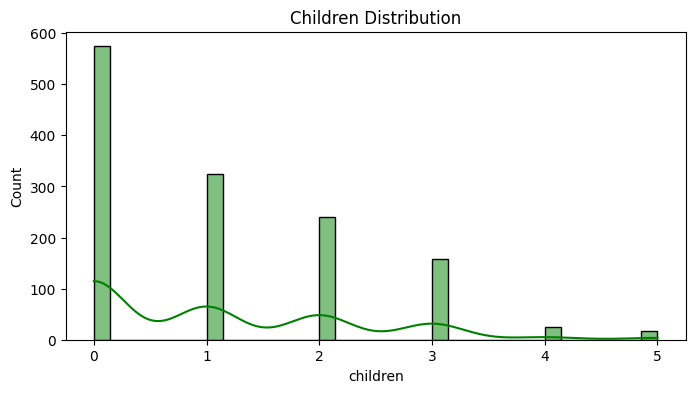

In [165]:
# plot children distribution; children are defined under 5 years old
plt.figure(figsize = (8, 4))
sns.histplot(data = df, x = 'children', kde = True, bins = 35, color = 'green')
plt.title('Children Distribution', fontsize = 12)

In [166]:
stats.shapiro(df['children'])

ShapiroResult(statistic=0.8231810331344604, pvalue=5.06690727121734e-36)

### Pvalue is less than 0.05, rejects hypothesis children ages are normally distributive

Text(0.5, 1.0, 'Charges Distribution')

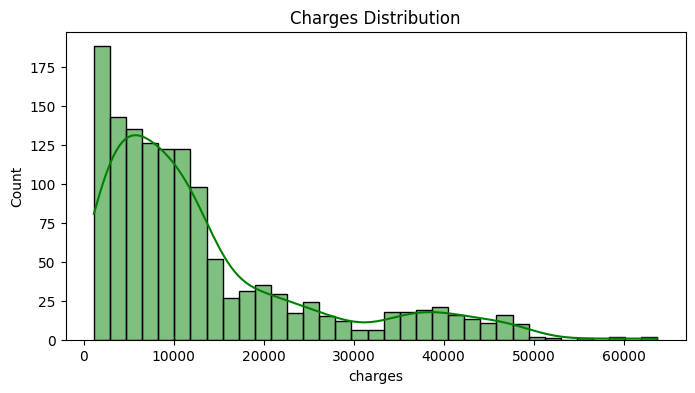

In [167]:
# plot charges distribution
plt.figure(figsize = (8, 4))
sns.histplot(data = df, x = 'charges', kde = True, bins = 35, color='green')
plt.title('Charges Distribution', fontsize = 12)

In [168]:
stats.shapiro(df['charges'])

ShapiroResult(statistic=0.8146880865097046, pvalue=1.1505194006561963e-36)

### Pvalue is less than 0.05, rejects hypothesis children ages are normally distributive

## Data Cleaning



1.   To show relationship between gender and insurance charges




In [169]:
# declare a new variable called desired_col for desired columns of the dataset & cleaned_df
desired_col = ['sex', 'charges']
cleaned_df = df[desired_col].copy()
cleaned_df.head()

,sex,charges
0,female,16884.92400
1,male,1725.55230
2,male,4449.46200
3,male,21984.47061
4,male,3866.85520


In [170]:
# Separate data for males and females
male_data = cleaned_df[cleaned_df['sex'] == 'male']['charges']
female_data = cleaned_df[cleaned_df['sex'] == 'female']['charges']

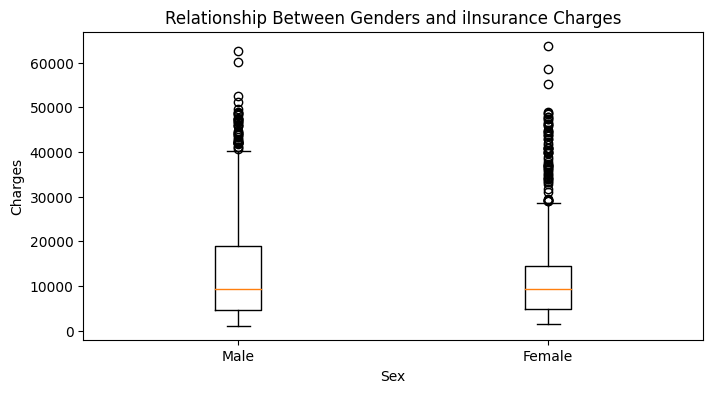

In [171]:
# Create a box plot
plt.figure(figsize=(8, 4))
plt.boxplot([male_data, female_data], labels=['Male', 'Female'])
plt.title('Relationship Between Genders and iInsurance Charges')
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.show()

### Males and females have almost same medium insurance charges, but males have larger range

In [172]:
new_desired_col = ['sex', 'charges', 'age']
new_cleaned_df = df[new_desired_col].copy()
new_cleaned_df.head()

,sex,charges,age
0,female,16884.92400,19
1,male,1725.55230,18
2,male,4449.46200,28
3,male,21984.47061,33
4,male,3866.85520,32


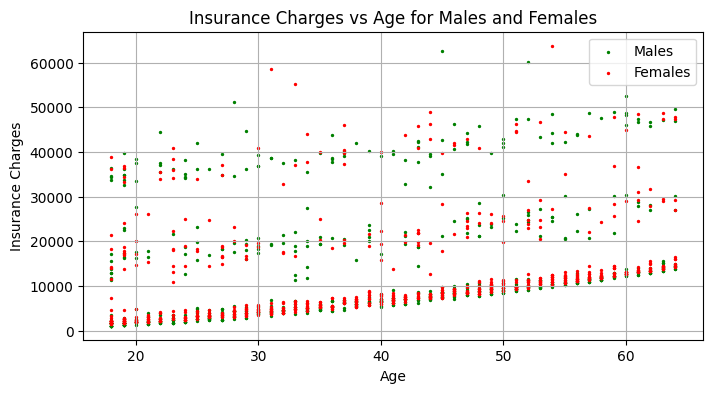

In [173]:
# Separate data for males and females
new_male_data = new_cleaned_df[cleaned_df['sex'] == 'male']
new_female_data = new_cleaned_df[cleaned_df['sex'] == 'female']

# Create a scatter plot
plt.figure(figsize=(8, 4))
plt.scatter(new_male_data['age'], new_male_data['charges'], color = 'green', label = 'Males', s = 2)
plt.scatter(new_female_data['age'], new_female_data['charges'], color = 'red', label = 'Females', s = 2)

# Add labels and title
plt.title('Insurance Charges vs Age for Males and Females')
plt.xlabel('Age')
plt.ylabel('Insurance Charges')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

In [174]:

# With the cleaned dataset stored in a DataFrame named cleaned_df

# Separate data for males and females
male_data = cleaned_df[cleaned_df['sex'] == 'male']['charges']
female_data = cleaned_df[cleaned_df['sex'] == 'female']['charges']

# Perform two-sample t-test
t_stat, p_value = ttest_ind(male_data, female_data)

# Define significance level
alpha = 0.05

# Print the results (t-statistic is a measure of the difference between the two sets expressed in units of standard error.)
print("Two-sample t-test results:")
print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. There is significant evidence that males have higher insurance charges than females.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence that males have higher insurance charges than females.")

Two-sample t-test results:
t-statistic: 2.097546590051688
p-value: 0.03613272100592976
Reject the null hypothesis. There is significant evidence that males have higher insurance charges than females.


## To find out what are the factors that causes increase of insurance

## Use linear regression analysis
### To understand how the independent variables (age, sex, bmi, children, smoker, region) collectively affect the dependent variable insurance charges.



1.   Preprocess the data: Handle categorical variables (e.g., sex, smoker, region) by encoding them into numerical format, and handle any missing values or outliers if necessary.



In [175]:
# Preprocess the data: Convert categorical variables to dummy variables
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])
df_encoded.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [176]:
 # Define independent variables (features) and dependent variable
X = df_encoded.drop(columns=['charges'])
y = df_encoded['charges']

In [177]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [178]:
# Fit a multiple linear regression model using sklearn
model_sklearn = LinearRegression()
model_sklearn.fit(X_train, y_train)

LinearRegression()

In [179]:
# Evaluate the model's performance on the testing data
y_pred = model_sklearn.predict(X_test)
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

R-squared: 0.7835929767120723


In [180]:
# Fit a multiple linear regression model using statsmodels
X_train_sm = sm.add_constant(X_train)  # Add constant term
model_sm = sm.OLS(y_train, X_train_sm).fit()

In [181]:
# Print model summary
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     380.9
Date:                Tue, 27 Feb 2024   Prob (F-statistic):          1.32e-305
Time:                        22:51:39   Log-Likelihood:                -10845.
No. Observations:                1070   AIC:                         2.171e+04
Df Residuals:                    1061   BIC:                         2.175e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -255.3492    486.430  

2.   Check coefficients and their p-values.



In [182]:
# Check coefficients and their p-values
coefficients = pd.DataFrame({'Coefficient': model_sm.params, 'P-value': model_sm.pvalues})
print("Coefficients and their p-values:")
print(coefficients)

Coefficients and their p-values:
                   Coefficient        P-value
const              -255.349206   5.997309e-01
age                 256.975706   6.310917e-70
bmi                 337.092552   4.109401e-24
children            425.278784   6.063516e-03
sex_female         -118.378757   6.996301e-01
sex_male           -136.970449   6.568014e-01
smoker_no        -11953.239031  2.653426e-195
smoker_yes        11697.889825  5.146262e-166
region_northeast    395.747943   2.369947e-01
region_northwest     25.070617   9.419972e-01
region_southeast   -262.116354   4.823837e-01
region_southwest   -414.051411   2.387102e-01



3. Exam the residuals by plotting their distribution to ensure they are normally distributed.



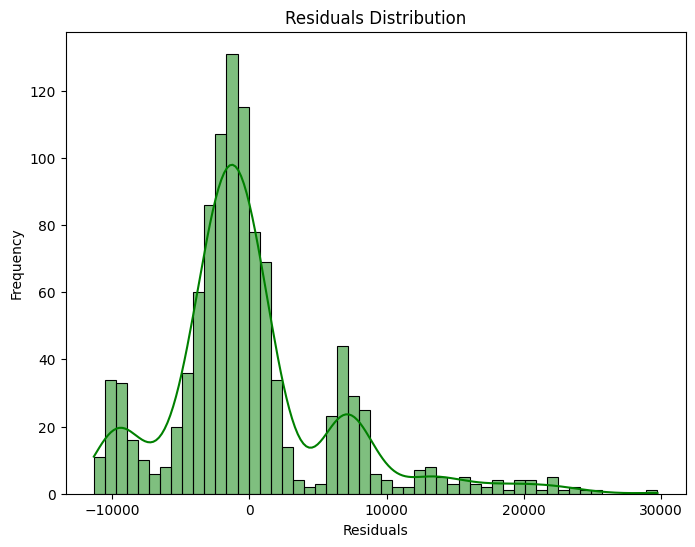

In [183]:
# Residual analysis: Plot residuals
residuals = model_sm.resid
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color = 'green')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

4. Correlation matrix



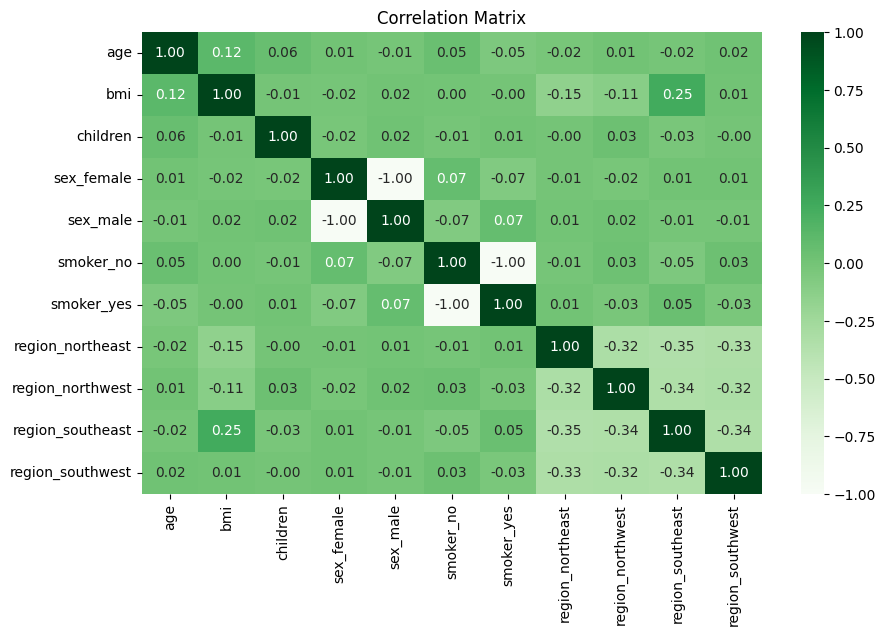

In [184]:
# Collinearity: Check correlation matrix
correlation_matrix = X_train.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()